In [48]:
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as pretrainedModel
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys , os 


In [25]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [26]:
!kaggle datasets download -d trolukovich/food5k-image-dataset

food5k-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [27]:
!unzip -qq -o food5k-image-dataset.zip

In [28]:
IMAGE_SIZE=[200,200]

In [29]:
ptm=pretrainedModel(input_shape=IMAGE_SIZE+[3],include_top=False,weights='imagenet')

In [17]:
ptm.trainable=False

In [18]:
folders=['training/food','training/non_food']
K=len(folders)
x=Flatten()(ptm.output)
x=Dense(K,activation='softmax')(x)

In [19]:
model=Model(inputs=ptm.input,outputs=x)

In [20]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0   

In [21]:
gen=ImageDataGenerator(rotation_range=20,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.2,horizontal_flip=True,preprocessing_function=preprocess_input)

In [22]:
batch_size=128
train_path='/content/training'
valid_path='/content/validation'


train_generator=gen.flow_from_directory(
    train_path,shuffle=True,target_size=IMAGE_SIZE,batch_size=batch_size
)

valid_generator=gen.flow_from_directory(
    valid_path,target_size=IMAGE_SIZE,batch_size=batch_size
)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [36]:
image_files=glob(train_path+'/*/*.jpg')
valid_image_files=glob(valid_path+'/*/*.jpg')

In [40]:
  r=model.fit_generator(
      train_generator,
      validation_data=valid_generator,
      epochs=10,
      steps_per_epoch=int(np.ceil(len(image_files)/batch_size)),
      validation_steps=int(np.ceil(len(valid_image_files)/batch_size))
  )

<ipython-input-40-c90bc9750aa4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(


Epoch 1/10
24/24 [==============================] - 82s 3s/step - loss: 1.2337 - accuracy: 0.9320 - val_loss: 0.8873 - val_accuracy: 0.9610
Epoch 2/10
24/24 [==============================] - 59s 2s/step - loss: 0.5083 - accuracy: 0.9753 - val_loss: 0.7550 - val_accuracy: 0.9690
Epoch 3/10
24/24 [==============================] - 64s 3s/step - loss: 0.2846 - accuracy: 0.9843 - val_loss: 0.7166 - val_accuracy: 0.9730
Epoch 4/10
24/24 [==============================] - 59s 2s/step - loss: 0.2255 - accuracy: 0.9887 - val_loss: 0.9813 - val_accuracy: 0.9650
Epoch 5/10
24/24 [==============================] - 64s 3s/step - loss: 0.2351 - accuracy: 0.9877 - val_loss: 0.8472 - val_accuracy: 0.9680
Epoch 6/10
24/24 [==============================] - 59s 2s/step - loss: 0.1935 - accuracy: 0.9903 - val_loss: 0.9118 - val_accuracy: 0.9650
Epoch 7/10
24/24 [==============================] - 59s 2s/step - loss: 0.2879 - accuracy: 0.9877 - val_loss: 0.9057 - val_accuracy: 0.9730
Epoch 8/10
24/24 [==

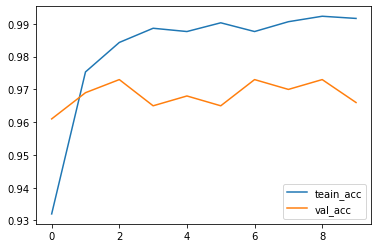

In [49]:
plt.plot(r.history['accuracy'],label='teain_acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

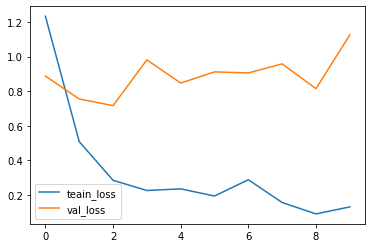

In [50]:
plt.plot(r.history['loss'],label='teain_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()